Suppose you want to approximate the beta distribution using the binomial distribution, or want to use the beta distribution as a continuous analogue to the binomial distribution.

The PMF of the binomial distribution and PDF beta distribution are
$$
{n \choose k} p^k (1-p)^{n-k},\quad \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}
$$
where $B$ is the beta function.

The mean and variance of the binomial distribution are
$$
\mu = np,\quad \sigma^2 = np(1-p)
$$
We can define a scaled version of the binomial distribution, on evenly-spaced points from 0 to 1, by dividing the random variable by $n$. The mean and variance of the scaled binomial distribution are
$$
\mu = p,\quad \sigma^2 = p(1-p)/n
$$
The mean and variance of the beta distribution are
$$
\mu = \frac{\alpha}{\alpha+\beta},\quad \sigma^2 = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$
Setting the mean and variance of the beta distribution and the scaled binomial equal to each other and solving the system of equations gives:
$$
\alpha = (n - 1) p,\quad \beta = (n - 1) (1-p), \quad\quad n = \alpha + \beta + 1,\quad p = \frac{\alpha}{\alpha+\beta}
$$

Interestingly, in the limit where $np$ is held constant but $p \to 0$, the beta distribution parameterized this way approaches the gamma distribution with $k=np, \theta=1$.

In [1]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 4
p = 1/3
x = np.linspace(0, 1, 100)
k = np.arange(n+1)
bi_c= stats.binom.cdf(x*n, n, p)
bi_p = stats.binom.pmf(k, n, p)
alpha = (n - 1)*p
beta = (n - 1)*(1 - p)
be_c = stats.beta.cdf(x, alpha, beta)
be_p = stats.beta.pdf(x, alpha, beta)

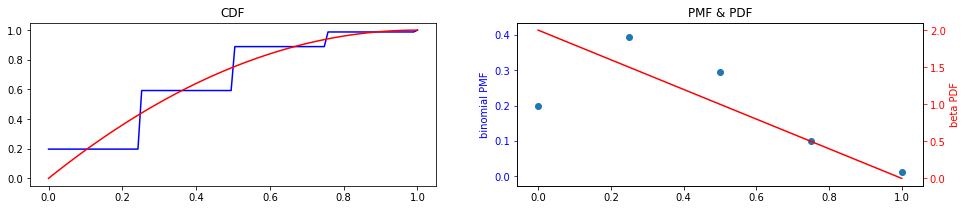

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,3))
f.set_size_inches
ax1.set_title("CDF")
ax1.plot(x, bi_c, 'b')
ax1.plot(x, be_c, 'r')
ax2.set_title("PMF & PDF")
ax2.scatter(k/n, bi_p)
ax2.set_ylabel('binomial PMF', color='b')
ax2.tick_params('y', colors='b')
ax3 = ax2.twinx()
ax3.plot(x, be_p, c='r')
ax3.set_ylabel('beta PDF', color='r')
ax3.tick_params('y', colors='r')
plt.show()